# Wybór współczynnika oversamplingu

## Pobranie danych z pliku

In [34]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Inicjacja struktur do testów

In [36]:
scores_false_negative = []
scores_false_positive = []
n_params = []

## Wybór współczynnika oversamplingu

### n = 0.5 (domyślnie)

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.5).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.5")

print(X_train_curr.shape)
print(X_train.shape)
print(sum(Y_train_curr))
print(sum(Y_train))

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71061    21]
 [   21    99]]
(319849, 30)
(213605, 30)
106616
[372]


### n = 0.4

In [38]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.4).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.4")

print(X_train_curr.shape)
print(X_train.shape)
print(sum(Y_train_curr))
print(sum(Y_train))

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71051    31]
 [   25    95]]
(298526, 30)
(213605, 30)
85293
[372]


### n = 0.65

In [39]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.65).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.65")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71054    28]
 [   23    97]]


### n = 0.75

In [40]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.75).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.75")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71067    15]
 [   23    97]]


### n = 0.85

In [41]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.85).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.85")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71068    14]
 [   20   100]]


### n = 0.9

In [42]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.9).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.9")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71064    18]
 [   27    93]]


### n = 0.95

In [43]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.95).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.95")

print(X_train_curr.shape)
print(X_train.shape)
print(sum(Y_train_curr))
print(sum(Y_train))

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71049    33]
 [   25    95]]
(415804, 30)
(213605, 30)
202571
[372]


### n = 0.99

In [44]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.99).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.99")

print(X_train_curr.shape)
print(X_train.shape)
print(sum(Y_train_curr))
print(sum(Y_train))

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71058    24]
 [   21    99]]
(424333, 30)
(213605, 30)
211100
[372]


### n = 0.999

In [47]:
X_train_curr, Y_train_curr = SMOTE(sampling_strategy=0.999).fit_resample(X_train, Y_train)

pipeline = make_pipeline(StandardScaler(), MLPClassifier())
pipeline.fit(X_train_curr, Y_train_curr)
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_negative.append(cm[1,0])
scores_false_positive.append(cm[0,1])
print(cm)
n_params.append("0.999")

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[71058    24]
 [   23    97]]


## Wyniki

### False negative

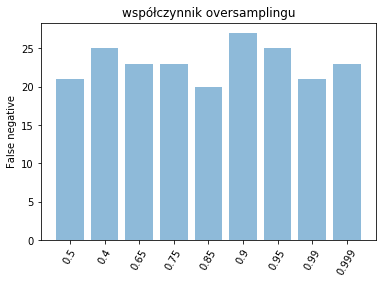

In [48]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(n_params)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(n_params)), n_params, rotation = 60)
plt.ylabel('False negative')
plt.title('współczynnik oversamplingu')

plt.show()

### False positive

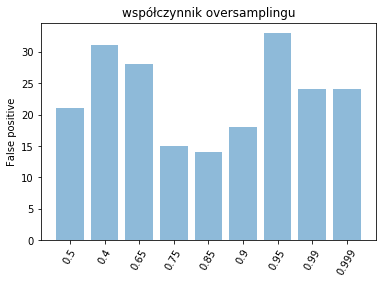

In [49]:
plt.bar(np.arange(len(n_params)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(n_params)), n_params, rotation = 60)
plt.ylabel('False positive')
plt.title('współczynnik oversamplingu')

plt.show()

## Wnioski

Z powyższych danych nie wynika żadna widoczna tendencja, jest to bardzo dziwne, biorąc pod uwagę fakt, że klasy sąskrajnie niezbalansowane. Do dalszych badań wybrano najlepszy wynik n = 85